In [21]:

from utils import fit_scaling_laws, plot_actual_vs_predicted
from experiments.evals.task_configs import CORE_TASKS, convert_to_task_metrics

ENTITY = "stanford-mercury"
PROJECT = "marin"

# define the list of smaller runs to use as "ladder" models
# RUNS = [
#     "tootsie-scaling-512-81c36c",
#     "tootsie-scaling-768-d17a90",
#     "tootsie-scaling-1024-f4e4be",
#     "tootsie-scaling-1536-e2a6d8",
#     "tootsie-scaling-2048-72c648",
# ]

RUNS = [
    "scaling-law-suite-default-v2-512-4d173f",
    "scaling-law-suite-default-v2-768-12373d",
    "scaling-law-suite-default-v2-1024-77c98b",
    "scaling-law-suite-default-v2-1536-18344d",
    "scaling-law-suite-default-v2-2048-7845a1",

]

DEFAULT_RUNS = [
    "scaling-law-suite-default-512-9b1182",
    "scaling-law-suite-default-768-0631eb",
    "scaling-law-suite-default-1024-e6a4e5",
    "scaling-law-suite-default-1536-51914a",
    "scaling-law-suite-default-2048-14ef39",
]



# the large run to predict the performance of
PRED_RUN = "llama-8b-tootsie-0.001-19ad63"

# define the eval task loss metric
TASK_LOSS = "eval/paloma/c4_en/bpb"
# TASK_LOSS = "internal_eval/mmlu/bpb"

# do we want to take the last step of the run or average over all steps, or just use all steps?
AGGREGATION = "all"

TOKENS_COL = "throughput/total_tokens"
PARAM_COL = "parameter_count"
PARAM_COL_TO_USE = "computed_params"

# accuracy we ultimately want to predict
TASK_ACCURACY = "lm_eval/hellaswag_10shot/acc"

ACCS = convert_to_task_metrics(CORE_TASKS, metric="acc")


In [22]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [23]:
results = fit_scaling_laws(
    runs=DEFAULT_RUNS,
    loss_metrics=[TASK_LOSS],
    accuracy_metrics=[TASK_ACCURACY], #ACCS,
    entity=ENTITY,
    project=PROJECT,
    pred_run=PRED_RUN,
    use_log_for_ND=True,
    normalize_ND=True,
)


In [24]:
results

({},
 ({'eval/paloma/c4_en/bpb': (array([0.88075703, 0.84879279, 0.83596116, 0.8281104 , 0.82302022,
           0.81882006, 0.81641668, 0.81367987, 0.81223959, 0.8107903 ,
           0.80884665, 0.80795377, 0.80673552, 0.80621433, 0.80519038,
           0.80455309, 0.80363607, 0.80237347, 0.80176669, 0.80091393,
           0.80123138, 0.80021042, 0.79994798, 0.79999822, 0.79894078,
           0.79975969, 0.7989825 , 0.7979725 , 0.79744339, 0.79764444,
           0.79725903, 0.7963618 , 0.79696178, 0.79613042, 0.79593462,
           0.79567122, 0.79516333, 0.79545355, 0.79514819, 0.79176152,
           0.79132468, 0.79041171, 0.78982705, 0.78952217, 0.7895807 ,
           0.78898627, 0.78872025, 0.78849959, 0.78850639, 0.78796756,
           0.78779185, 0.78690326, 0.78722352, 0.78678226, 0.7862345 ,
           0.78649789, 0.78638011, 0.7860859 , 0.78561205, 0.78554761,
           0.78619677, 0.78568959, 0.78554815, 0.78551286, 0.78490293,
           0.78483886, 0.78501928, 0.78438234, 

In [25]:
type(results)

tuple

In [26]:
len(predictions)

4

eval/paloma/c4_en/bpb
[0.88075703 0.84879279 0.83596116 0.8281104  0.82302022 0.81882006
 0.81641668 0.81367987 0.81223959 0.8107903  0.80884665 0.80795377
 0.80673552 0.80621433 0.80519038 0.80455309 0.80363607 0.80237347
 0.80176669 0.80091393 0.80123138 0.80021042 0.79994798 0.79999822
 0.79894078 0.79975969 0.7989825  0.7979725  0.79744339 0.79764444
 0.79725903 0.7963618  0.79696178 0.79613042 0.79593462 0.79567122
 0.79516333 0.79545355 0.79514819 0.79176152 0.79132468 0.79041171
 0.78982705 0.78952217 0.7895807  0.78898627 0.78872025 0.78849959
 0.78850639 0.78796756 0.78779185 0.78690326 0.78722352 0.78678226
 0.7862345  0.78649789 0.78638011 0.7860859  0.78561205 0.78554761
 0.78619677 0.78568959 0.78554815 0.78551286 0.78490293 0.78483886
 0.78501928 0.78438234 0.78446639 0.78501964 0.7845459  0.7840997
 0.78449345 0.78442794 0.78412217 0.78367698 0.78419703 0.78532344
 0.78386343 0.78318363 0.78275383 0.78356421 0.78376573 0.78342468]
[0.88345877 0.86041726 0.84919356 0.8420

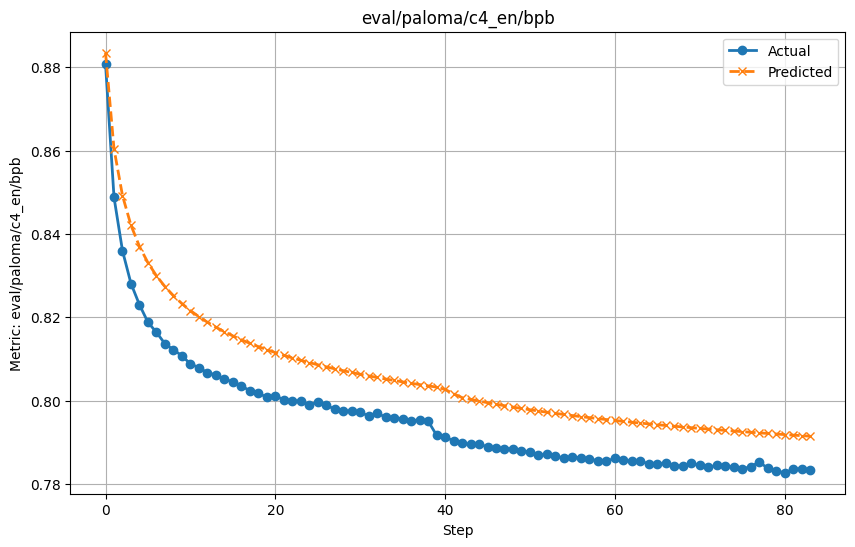

In [27]:
_, predictions = results
loss_results, accuracy_results, _, _ = predictions

for loss_metric, (actual, predicted) in loss_results.items():
    print(loss_metric)
    print(actual)
    print(predicted)

    # plot actual vs predicted
    plot_actual_vs_predicted(actual, predicted, loss_metric)
    break




In [42]:
for index, (acc_metric, (actual, predicted)) in enumerate(accuracy_results.items()):
    print(acc_metric)
    print(actual)
    print(predicted)

    # plot actual vs predicted
    if index == 13:
        plot_actual_vs_predicted(actual, predicted, acc_metric)
        break    



lm_eval/agieval_lsat_ar/acc_from_eval/paloma/c4_en/bpb
[0.22173913 0.15652174 0.20434783 0.19130435 0.22173913 0.17826087
 0.21304348 0.20434783 0.1826087  0.19565217 0.2173913  0.20434783
 0.21304348 0.19130435 0.26086957 0.20434783 0.19130435 0.17826087
 0.17391304 0.24347826 0.23043478 0.24347826 0.20869565 0.2
 0.21304348 0.23043478 0.19130435 0.18695652 0.19565217 0.15652174
 0.22173913 0.1826087  0.23043478 0.23043478 0.23043478 0.23043478
 0.2        0.15652174 0.19130435 0.17826087 0.17826087 0.18695652
 0.17826087 0.16086957 0.16086957]
[0.22816635 0.22816635 0.22816635 0.22816635 0.22816635 0.22816635
 0.22816635 0.22816635 0.22816635 0.22816635 0.22816635 0.22816635
 0.22816635 0.22816635 0.22816635 0.22816635 0.22816635 0.22816635
 0.22816635 0.22816635 0.22816635 0.22816635 0.22816635 0.22816635
 0.22816635 0.22816635 0.22816635 0.22816635 0.22816635 0.22816635
 0.22816635 0.22816635 0.22816635 0.22816635 0.22816635 0.22816635
 0.22816635 0.22816635 0.22816635 0.22816635 0